Number of unique artists: 170327
Number of unique tracks: 1401016
        duration_ms    popularity  acousticness  danceability        energy  \
count  1.396052e+06  1.396052e+06  1.396052e+06  1.396052e+06  1.396052e+06   
mean   2.454640e+05  1.904510e+01  3.219583e-01  5.419735e-01  6.335594e-01   
std    1.420316e+05  1.679690e+01  3.513921e-01  1.841584e-01  2.677625e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.797470e+05  4.000000e+00  8.220000e-03  4.180000e-01  4.490000e-01   
50%    2.230400e+05  1.600000e+01  1.550000e-01  5.550000e-01  6.820000e-01   
75%    2.810270e+05  3.000000e+01  6.330000e-01  6.810000e-01  8.640000e-01   
max    6.000495e+06  9.600000e+01  9.960000e-01  9.930000e-01  1.000000e+00   

       instrumentalness           key      liveness      loudness  \
count      1.396052e+06  1.396052e+06  1.396052e+06  1.396052e+06   
mean       2.389032e-01  5.282269e+00  2.169306e-01 -8.955530e+00   
std        3.59

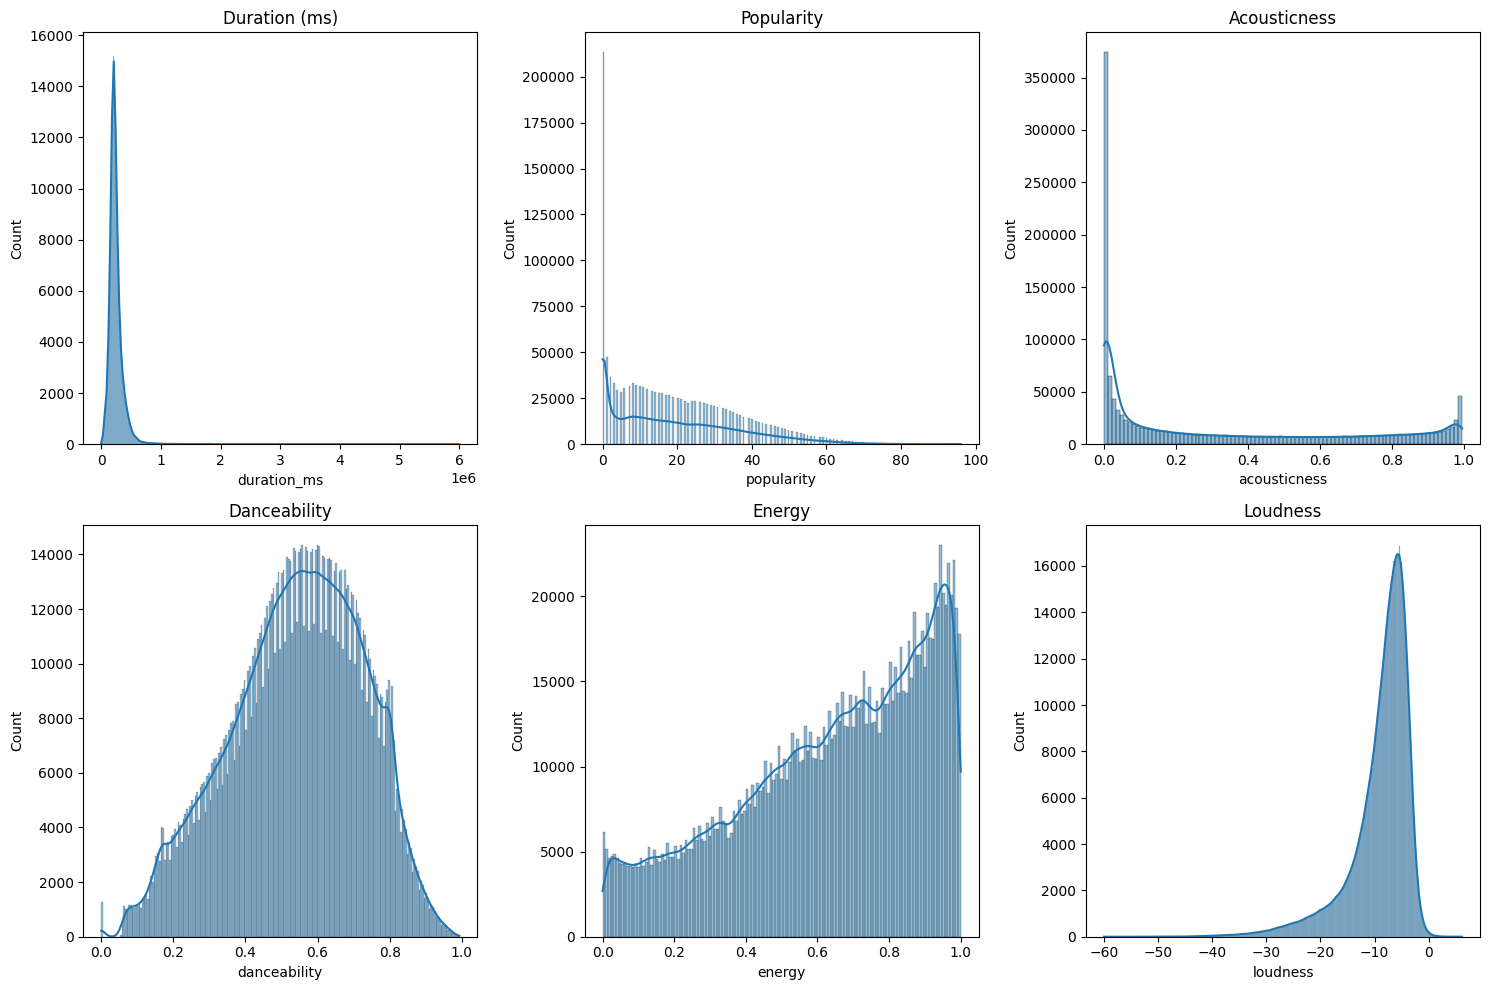

ValueError: could not convert string to float: '7pskYSHhRTH1TFtVdQevG5'

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('C:/Users/Adeteyah/Documents/music_recommender_system/data/db/songs_details.db')

# Load data into pandas DataFrames
artists_df = pd.read_sql_query("SELECT * FROM artists", conn)
tracks_df = pd.read_sql_query("SELECT * FROM tracks", conn)

# Data Summary
print(f"Number of unique artists: {artists_df['artist_id'].nunique()}")
print(f"Number of unique tracks: {tracks_df['track_id'].nunique()}")

# Summary statistics for tracks
print(tracks_df.describe())

# Distribution Analysis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(tracks_df['duration_ms'], kde=True, ax=axs[0, 0]).set(title='Duration (ms)')
sns.histplot(tracks_df['popularity'], kde=True, ax=axs[0, 1]).set(title='Popularity')
sns.histplot(tracks_df['acousticness'], kde=True, ax=axs[0, 2]).set(title='Acousticness')
sns.histplot(tracks_df['danceability'], kde=True, ax=axs[1, 0]).set(title='Danceability')
sns.histplot(tracks_df['energy'], kde=True, ax=axs[1, 1]).set(title='Energy')
sns.histplot(tracks_df['loudness'], kde=True, ax=axs[1, 2]).set(title='Loudness')
plt.tight_layout()
plt.show()

# Correlation Matrix
corr_matrix = tracks_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Genre Analysis
# Assuming genres are stored as comma-separated values
artists_df['artist_genres'] = artists_df['artist_genres'].str.split(',')
genres_exploded = artists_df.explode('artist_genres')
top_genres = genres_exploded['artist_genres'].value_counts().head(10)
top_genres.plot(kind='bar', title='Top 10 Genres')
plt.show()

# Close the database connection
conn.close()